# Procesando Bulk de datos

## 1 Particionado

### 1.1 Definicones

In [1]:
import graphlab

In [2]:
# Creamos función para separar tabla bulk en multiples tablas
def getTableBy_datalogger_name(jacintaTable,dl_name):
    #Iteramos por columnas buscando dl_name en fila 2 de cada columna
    retorno = []
    col_list = []
    if dl_name != 'datalogger_name':
        col_list = ['X1']
    col_names = {}
    newTable = []
    
    for i in range(jacintaTable.num_cols()):
        if jacintaTable["X" + str(i+1)][0] == dl_name:
            col_list.append("X" + str(i+1))
            col_names["X" + str(i+1)] = jacintaTable["X" + str(i+1)][1] + ' - ' + jacintaTable["X" + str(i+1)][2] + ' - ' + jacintaTable["X" + str(i+1)][3]
    
    newTable = jacintaTable[col_list]
    #Copiamos de la fila 4 en adelante
    newTable = newTable[4:]
    col_names['X1'] = 'Timestamp'
    newTable.rename(col_names)
    retorno = newTable
    return retorno

# Creamos función para separar por 'device_name' de cada 'datalogger_name'
def getTableBy_device_name(jacintaTable,dl_name,dv_name):
    #Iteramos por columnas buscando dl_name en fila 2 de cada columna
    retorno = []
    col_list = []
    if dl_name != 'datalogger_name':
        col_list = ['X1']
    col_names = {}
    
    for i in range(jacintaTable.num_cols()):
        if (jacintaTable["X" + str(i+1)][0] == dl_name) and (jacintaTable["X" + str(i+1)][1] == dv_name):
            col_list.append("X" + str(i+1))
            col_names["X" + str(i+1)] = jacintaTable["X" + str(i+1)][1] + ' - ' + jacintaTable["X" + str(i+1)][2] + ' - ' + jacintaTable["X" + str(i+1)][3]
                

    newTable = jacintaTable[col_list]
    #Copiamos de la fila 4 en adelante
    newTable = newTable[4:]
    col_names['X1'] = 'Timestamp'
    newTable.rename(col_names)
    retorno = newTable
    return retorno

# Función que crea una lista de los valores que contiene las filas 1 y 2 sin repetidos
def getDevicesList(jacintaTable):
    devList = []
    for i in jacintaTable[0]:
        devList.append(jacintaTable[i][0] + '__' + jacintaTable[i][1])
    return set(devList)

def getDataLoggerList(jt):
    loggerList = set(jt[0].values())
    return loggerList

#Función que recorre la lista de Tablas, separa los datos y los guarda en un CSV con el nombre de la tabla
def ExtractL1(list,jacintaTable,dst):
    for l in list:
        sub_table = getTableBy_datalogger_name(jacintaTable,l)
        sub_table.export_csv(dst + '/' + str(l) + '.csv',';')
        print str(l) + ' process'

def ExtractL2(list,jacintaTable,dst):
    for l in list:
        parts = []
        pre = ""
        suf = ""
        #Separamos por símbolo '__'
        parts = l.split('__')
        pre = parts[0]
        suf = parts[1]
        
        sub_table = getTableBy_device_name(jacintaTable,pre,suf)
        sub_table.export_csv(dst + '/'  + str(l) + '.csv',';')
        print str(l) + ' process'
        
def ResetContext():
    logger_list.clear()
    dev_list.clear()

### 1.2 Contexto

In [3]:
# Directorio de trabajo
src = 'C:/TURI/Jacinta/clean/'

### 1.3 Ejemplo

In [10]:
# Ejemplo datos sin tratar
jacinta_0616 = graphlab.SFrame.read_csv(src + '2552_2016-06-01.csv', delimiter=';',header= False)
jacinta_0616.head()

Finished parsing file C:\TURI\Jacinta\clean\2552_2016-06-01.csv

Parsing completed. Parsed 100 lines in 0.743043 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,

Finished parsing file C:\TURI\Jacinta\clean\2552_2016-06-01.csv

Parsing completed. Parsed 2486 lines in 2.96217 secs.

X1,X2,X3,X4,X5,X6,X7
datalogger_name,CT01,CT01,CT01,CT01,CT01,CT01
device_name,Inversor 01.2,Inversor 01.2,Inversor 01.2,Inversor 01.2,Inversor 01.2,Inversor 01.2
parameter_name,COMS STATUS,ACTIVE ENERGY,ACTIVE ENERGY TODAY,ACTIVE POWER,REACTIVE POWER,POWER FACTOR
unit,,kWh,kWh,kW,kVAr,
22/06/2016 7:10,,0,0,0,0,0
22/06/2016 7:20,128,0,0,0,0,0
22/06/2016 7:25,128,0,0,0,0,0
22/06/2016 7:30,128,0,0,0,0,0
22/06/2016 7:35,128,0,0,0,0,0
22/06/2016 7:40,128,0,0,0,0,0


### 1.4 Extracción

In [ ]:

# 06-2016 #########################################################################
jac0616 = '2552_2016-06-01.csv'
dst = src + '0616'

jacinta_0616 = graphlab.SFrame.read_csv(src + jac0616, delimiter=';',header= False)

##Procesamos los datos separando en tablas - Primer Nivel
#logger_list = getDataLoggerList(jacinta_0616)
#ExtractL1(logger_list,jacinta_0616,dst)

##Procesamos los datos separando en tablas - Segundo Nivel
#dev_list = getDevicesList(jacinta_0616)
#ExtractL2(dev_list,jacinta_0616,dst)
print '### 0616 done ###'

# 07-2016 #########################################################################

jac0716 = '2552_2016-07-01.csv'
dst = src + '0716'

jacinta_0716 = graphlab.SFrame.read_csv(src + jac0716, delimiter=';',header= False)

##Procesamos los datos separando en tablas - Primer Nivel
#logger_list = getDataLoggerList(jacinta_0716)
#ExtractL1(logger_list,jacinta_0716,dst)

##Procesamos los datos separando en tablas - Segundo Nivel
#dev_list = getDevicesList(jacinta_0716)
#ExtractL2(dev_list,jacinta_0716,dst)
print '### 0716 done ###'

# 08-2016 #########################################################################

jac0816 = '2552_2016-08-01.csv'
dst = src + '0816'

jacinta_0816 = graphlab.SFrame.read_csv(src + jac0816, delimiter=';',header= False)

##Procesamos los datos separando en tablas - Primer Nivel
#logger_list = getDataLoggerList(jacinta_0816)
#ExtractL1(logger_list,jacinta_0816,dst)

#Procesamos los datos separando en tablas - Segundo Nivel
dev_list = getDevicesList(jacinta_0816)
ExtractL2(dev_list,jacinta_0816,dst)
print '### 0816 done ###'

# 09-2016 #########################################################################

jac0916 = '2552_2016-09-01.csv'
dst = src + '0916'

jacinta_0916 = graphlab.SFrame.read_csv(src + jac0916, delimiter=';',header= False)

##Procesamos los datos separando en tablas - Primer Nivel
#logger_list = getDataLoggerList(jacinta_0916)
#ExtractL1(logger_list,jacinta_0916,dst)

#Procesamos los datos separando en tablas - Segundo Nivel
dev_list = getDevicesList(jacinta_0916)
ExtractL2(dev_list,jacinta_0916,dst)
print '### 0916 done ###'

# 10-2016 #########################################################################

jac1016 = '2552_2016-10-01.csv'
dst = src + '1016'

jacinta_1016 = graphlab.SFrame.read_csv(src + jac1016, delimiter=';',header= False)

##Procesamos los datos separando en tablas - Primer Nivel
#logger_list = getDataLoggerList(jacinta_1016)
#ExtractL1(logger_list,jacinta_1016,dst)

#Procesamos los datos separando en tablas - Segundo Nivel
dev_list = getDevicesList(jacinta_1016)
ExtractL2(dev_list,jacinta_1016,dst)
print '### 1016 done ###'

# 11-2016 #########################################################################

jac1116 = '2552_2016-11-01.csv'
dst = src + '1116'

jacinta_1116 = graphlab.SFrame.read_csv(src + jac1116, delimiter=';',header= False)

##Procesamos los datos separando en tablas
#logger_list = getDataLoggerList(jacinta_1116)
#ExtractL1(logger_list,jacinta_1116,dst)

#Procesamos los datos separando en tablas
dev_list = getDevicesList(jacinta_1116)
ExtractL2(dev_list,jacinta_1116,dst)
print '### 1116 done ###'

# 12-2016 #########################################################################

jac1216 = '2552_2016-12-01.csv'
dst = src + '1216'

jacinta_1216 = graphlab.SFrame.read_csv(src + jac1216, delimiter=';',header= False)

##Procesamos los datos separando en tablas
#logger_list = getDataLoggerList(jacinta_1216)
#ExtractL1(logger_list,jacinta_1216,dst)

#Procesamos los datos separando en tablas
dev_list = getDevicesList(jacinta_1216)
ExtractL2(dev_list,jacinta_1216,dst)
print '### 1216 done ###'

# 01-2017 #########################################################################

jac0117 = '2552_2017-01-01.csv'
dst = src + '0117'

jacinta_0117 = graphlab.SFrame.read_csv(src + jac0117, delimiter=';',header= False)

##Procesamos los datos separando en tablas
#logger_list = getDataLoggerList(jacinta_0117)
#ExtractL1(logger_list,jacinta_0117,dst)

#Procesamos los datos separando en tablas
dev_list = getDevicesList(jacinta_0117)
ExtractL2(dev_list,jacinta_0117,dst)
print '### 0117 done ###'

# 02-2017 #########################################################################

jac0217 = '2552_2017-02-01.csv'
dst = src + '0217'

jacinta_0217 = graphlab.SFrame.read_csv(src + jac0217, delimiter=';',header= False)

#Procesamos los datos separando en tablas
#logger_list = getDataLoggerList(jacinta_0217)
#ExtractL1(logger_list,jacinta_0217,dst)

#Procesamos los datos separando en tablas
dev_list = getDevicesList(jacinta_0217)
ExtractL2(dev_list,jacinta_0217,dst)
print '### 0217 done ###'

# 03-2017 #########################################################################

jac0317 = '2552_2017-03-01.csv'
dst = src + '0317'

jacinta_0317 = graphlab.SFrame.read_csv(src + jac0317, delimiter=';',header= False)

##Procesamos los datos separando en tablas
#logger_list = getDataLoggerList(jacinta_0317)
#ExtractL1(logger_list,jacinta_0317,dst)

#Procesamos los datos separando en tablas
dev_list = getDevicesList(jacinta_0317)
ExtractL2(dev_list,jacinta_0317,dst)
print '### 0317 done ###'


Finished parsing file C:\TURI\Jacinta\clean\2552_2016-06-01.csv

Parsing completed. Parsed 100 lines in 1.01106 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,

Finished parsing file C:\TURI\Jacinta\clean\2552_2016-06-01.csv

Parsing completed. Parsed 2486 lines in 3.62721 secs.

### 0616 done ###


Finished parsing file C:\TURI\Jacinta\clean\2552_2016-07-01.csv

Parsing completed. Parsed 100 lines in 1.11906 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,

Read 2839 lines. Lines per second: 574.199

Read 5714 lines. Lines per second: 306.183

Finished parsing file C:\TURI\Jacinta\clean\2552_2016-07-01.csv

Parsing completed. Parsed 8847 lines in 19.4521 secs.

### 0716 done ###


<img src="./doc/ExportL1_3.jpg">

## 2 Mergeado de meses

### 2.1 Definiciones

In [7]:
import graphlab

In [4]:
# Función que recorre una lista de carpeta buscando un fichero para mergear sus contenidos en una variable
# Supone que todos los CSVs tienen el mismo esquema
def MergeFiles(src_list, file_name):
    col_types = ()
    i = 1
    dataFrame = []
    for src in src_list:
        try:
            if i == 1:
                dataFrame = graphlab.SFrame.read_csv(src + file_name, delimiter=';',header= True)
                col_types = dataFrame.column_types()
                i = i+1
            else:
                dataFrame = dataFrame.append(graphlab.SFrame.read_csv(src + file_name, delimiter= ';', header = True,column_type_hints=col_types))
        except:
            print src  + file_name + " - file not found!"
    return dataFrame

### 2.2 Contexto

In [5]:
# Listamos carpetas a procesar
src_list =('C:/TURI/Jacinta/clean/0616/',
           'C:/TURI/Jacinta/clean/0716/',
           'C:/TURI/Jacinta/clean/0816/',
           'C:/TURI/Jacinta/clean/0916/',
           'C:/TURI/Jacinta/clean/1016/',
           'C:/TURI/Jacinta/clean/1116/',
           'C:/TURI/Jacinta/clean/1216/',
           'C:/TURI/Jacinta/clean/0117/',
           'C:/TURI/Jacinta/clean/0217/',
           'C:/TURI/Jacinta/clean/0317/')

#Lista ficheros a procesar
file_list = ('CT01','CT02','CT03','CT04','CT05','CT06','CT07','CT08','CT09','CT10','CT11','CT12','CT13','CT14','CT15','CT16',
             'CT17','CT18','CT19','CT20','CT21','CT22','CT23','CT24','CT25','Meteo','Sub')

# Carpeta destino nuevos CSVs mergeados
dst = 'C:/TURI/Jacinta/merged/'

### 2 .3 Merge

In [ ]:
# Procesado de ficheros a mergear
for f in file_list:
    exec(f + " = []")
    exec(f + "=  MergeFiles(src_list,'" + f + ".csv')")
    # Exportamos a CSV
    exec(f + ".export_csv('" + dst + "/"  + f + ".csv',';')")


#### 2.3.1 Ejemplo

In [8]:
# Ejemplo datos sin tratar
jacinta_CT01 = graphlab.SFrame.read_csv(dst + 'CT01.csv', delimiter=';',header= True)
jacinta_CT01.head()

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\rico\AppData\Local\Temp\graphlab_server_1491128095.log.0


This non-commercial license of GraphLab Create for academic use is assigned to jvirico@gmail.com and will expire on March 09, 2018.


Finished parsing file C:\TURI\Jacinta\merged\CT01.csv

Parsing completed. Parsed 100 lines in 0.950054 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,long,long,long,float,float,float,long,float,long,long,long,long,float,float,float,long,float,long,long,float,float,long,long,long,long,long,long,float,long,float,long,long,float,long,long,long,long,float,long,long,long,long,long,float,float,long,long,long,long,long,long,float,long,float,long,long,float,long,long,long,long,float,long,long,long,long,long,float,float,long,long,long,long,long,long,float,long,float,long,long,float,long,long,long,long,float,long,long,long,long,long,float,float,long,long,long,long,long,long,float,long,float,long,long,float,long,long,long,long,float,long,long,long,long,long,float,float,long,long,long,long,long,long,float,long,float,long,long,float,long,long,long,long,float,long,long,long,long,long,float,float,long,long,long,long,long,long,float,long,float,long,long,float,long,long,long,long,float,long,long,long,long,long,float,float,l

Read 67496 lines. Lines per second: 47866.8

Finished parsing file C:\TURI\Jacinta\merged\CT01.csv

Parsing completed. Parsed 78012 lines in 1.47809 secs.

Timestamp,Inversor 01.2 - COMSSTATUS - ...,Inversor 01.2 - ACTIVEENERGY - kWh ...,Inversor 01.2 - ACTIVEENERGY TODAY - kWh ...,Inversor 01.2 - ACTIVEPOWER - kW ...
22/06/2016 7:10,None,0,0,0.0
22/06/2016 7:20,128,0,0,0.0
22/06/2016 7:25,128,0,0,0.0
22/06/2016 7:30,128,0,0,0.0
22/06/2016 7:35,128,0,0,0.0
22/06/2016 7:40,128,0,0,0.0
22/06/2016 7:45,128,0,0,0.0
22/06/2016 7:50,128,0,0,0.0
22/06/2016 7:55,128,0,0,0.0
22/06/2016 8:00,128,0,0,0.0


## 3 Modelado de datos

### 3.1 Definiciones

In [6]:
import glob, os
import graphlab as gl

## Cargamos ficheros csv en variables SFrame
def get_CSVs(path, types, delimiter, traverse_dirs, sframes_list,sframes_name_list):
    
    os.chdir(path)
    files_grabbed = []
    
    ## Filtramos por extension
    for t in types:
        files_grabbed.extend(glob.glob(t))
    
    #print files_grabbed
    
    for file in files_grabbed:
        ## creamos variable con nombre de archivo y creamos SFrame
        foo = os.path.splitext(str(file))[0].replace("['","").replace(" ","_")
        filename = str(file).replace("['","").replace("']","")
        
        print filename + ' -> ' + foo
        
        exec(foo + '= gl.SFrame.read_csv("' + path + '/' + filename + '", delimiter="' + delimiter + '",header= True)')
        exec('sframes_list.append(' + foo + ')')
        sframes_name_list.append(foo)
        

### 3.2 Contexto

In [8]:
# Procesamos todos los CSVs del siguiente directorio
src =  'C:/TURI/Jacinta/merged/few'
# Filtramos por las siguiente extensiones de fichero
types = ['*.csv','*.txt']

### 3.3 Cremos SFrames a partir de CSVs mergeados en paso anterior

In [10]:
sframes_list = []
sframes_name_list = []

# Obtenemos listado de SFrames a partir de CSVs
get_CSVs(src,types,';',False, sframes_list, sframes_name_list)

## Creamos SFrames en este contexto
i = 0
for name in sframes_name_list:
    exec(name + "= sframes_list[" + str(i) + "]")
    i = i + 1

## Creados SFrames
print sframes_name_list

CT01.csv -> CT01


Finished parsing file C:\TURI\Jacinta\merged\few\CT01.csv

Parsing completed. Parsed 100 lines in 0.809047 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,long,long,long,float,float,float,long,float,long,long,long,long,float,float,float,long,float,long,long,float,float,long,long,long,long,long,long,float,long,float,long,long,float,long,long,long,long,float,long,long,long,long,long,float,float,long,long,long,long,long,long,float,long,float,long,long,float,long,long,long,long,float,long,long,long,long,long,float,float,long,long,long,long,long,long,float,long,float,long,long,float,long,long,long,long,float,long,long,long,long,long,float,float,long,long,long,long,long,long,float,long,float,long,long,float,long,long,long,long,float,long,long,long,long,long,float,float,long,long,long,long,long,long,float,long,float,long,long,float,long,long,long,long,float,long,long,long,long,long,float,float,long,long,long,long,long,long,float,long,float,long,long,float,long,long,long,long,float,long,long,long,long,long,float,float,l

Read 67496 lines. Lines per second: 48277.6

Finished parsing file C:\TURI\Jacinta\merged\few\CT01.csv

Parsing completed. Parsed 78012 lines in 1.48108 secs.

CT02.csv -> CT02


Finished parsing file C:\TURI\Jacinta\merged\few\CT02.csv

Parsing completed. Parsed 100 lines in 0.808047 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,long,long,long,float,float,float,long,float,long,long,long,long,float,float,float,long,float,long,long,float,float,long,long,long,long,long,long,float,long,float,long,long,float,long,long,long,long,float,long,long,long,long,long,float,float,long,long,long,long,long,long,float,long,float,long,long,float,long,long,long,long,float,long,long,long,long,long,float,float,long,long,long,long,long,long,float,long,float,long,long,float,long,long,long,long,float,long,long,long,long,long,float,float,long,long,long,long,long,long,float,long,float,long,long,float,long,long,long,long,float,long,long,long,long,long,float,float,long,long,long,long,long,long,float,long,float,long,long,float,long,long,long,str,float,long,long,long,long,long,float,float,long,long,long,long,long,long,float,long,float,long,long,float,long,long,long,str,float,long,long,long,long,long,float,float,lon

Finished parsing file C:\TURI\Jacinta\merged\few\CT02.csv

Parsing completed. Parsed 78012 lines in 1.60109 secs.

Meteo.csv -> Meteo


Finished parsing file C:\TURI\Jacinta\merged\few\Meteo.csv

Parsing completed. Parsed 100 lines in 0.156009 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,long,float,float,float,float,float,float,float,float,float,float,float,long,float,long,float,float,float,float,float,float,float,float,float,float,float,long,float,long,float,float,float,float,float,float,float,float,float,float,float,long,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file C:\TURI\Jacinta\merged\few\Meteo.csv

Parsing completed. Parsed 51715 lines in 0.262015 secs.

['CT01', 'CT02', 'Meteo']


### 3.4 Limieza de datos

In [ ]:
# Eliminamos entradas con todos los COMS STATUS = 128
Meteo_v1 = Meteo[Meteo['Estacion meteorologica 07 - COMS STATUS -'] == 0 and Meteo['Estacion meteorologica 13 - COMS STATUS -'] == 0 and Meteo['Estacion meteorologica 25 - COMS STATUS -'] == 0]
CT01_v1 = CT01[CT01['Inversor 01.2 - COMS STATUS -'] == 0] and CT01[CT01['Inversor 01.1 - COMS STATUS -'] == 0]
CT02_v1 = CT02[CT02['Inversor 02.2 - COMS STATUS -'] == 0] and CT02[CT02['Inversor 02.1 - COMS STATUS -'] == 0]
CT03_v1 = CT03[CT03['Inversor 03.2 - COMS STATUS -'] == 0] and CT03[CT03['Inversor 03.1 - COMS STATUS -'] == 0]
CT04_v1 = CT04[CT04['Inversor 04.2 - COMS STATUS -'] == 0] and CT04[CT04['Inversor 04.1 - COMS STATUS -'] == 0]
CT05_v1 = CT05[CT05['Inversor 05.2 - COMS STATUS -'] == 0] and CT05[CT05['Inversor 05.1 - COMS STATUS -'] == 0]
CT06_v1 = CT06[CT06['Inversor 06.2 - COMS STATUS -'] == 0] and CT06[CT06['Inversor 06.1 - COMS STATUS -'] == 0]
CT07_v1 = CT07[CT07['Inversor 07.2 - COMS STATUS -'] == 0] and CT07[CT07['Inversor 07.1 - COMS STATUS -'] == 0]
CT08_v1 = CT08[CT08['Inversor 08.2 - COMS STATUS -'] == 0] and CT08[CT08['Inversor 08.1 - COMS STATUS -'] == 0]
CT09_v1 = CT09[CT09['Inversor 09.2 - COMS STATUS -'] == 0] and CT09[CT09['Inversor 09.1 - COMS STATUS -'] == 0]
CT10_v1 = CT10[CT10['Inversor 10.2 - COMS STATUS -'] == 0] and CT10[CT10['Inversor 10.1 - COMS STATUS -'] == 0]
CT11_v1 = CT11[CT11['Inversor 11.2 - COMS STATUS -'] == 0] and CT11[CT11['Inversor 11.1 - COMS STATUS -'] == 0]
CT12_v1 = CT12[CT12['Inversor 12.2 - COMS STATUS -'] == 0] and CT12[CT12['Inversor 12.1 - COMS STATUS -'] == 0]
CT13_v1 = CT13[CT13['Inversor 13.2 - COMS STATUS -'] == 0] and CT13[CT13['Inversor 13.1 - COMS STATUS -'] == 0]
CT14_v1 = CT14[CT14['Inversor 14.2 - COMS STATUS -'] == 0] and CT14[CT14['Inversor 14.1 - COMS STATUS -'] == 0]
CT15_v1 = CT15[CT15['Inversor 15.2 - COMS STATUS -'] == 0] and CT15[CT15['Inversor 15.1 - COMS STATUS -'] == 0]
CT16_v1 = CT16[CT16['Inversor 16.2 - COMS STATUS -'] == 0] and CT16[CT16['Inversor 16.1 - COMS STATUS -'] == 0]
CT17_v1 = CT17[CT17['Inversor 17.2 - COMS STATUS -'] == 0] and CT17[CT17['Inversor 17.1 - COMS STATUS -'] == 0]
CT18_v1 = CT18[CT18['Inversor 18.2 - COMS STATUS -'] == 0] and CT18[CT18['Inversor 18.1 - COMS STATUS -'] == 0]
CT19_v1 = CT19[CT19['Inversor 19.2 - COMS STATUS -'] == 0] and CT19[CT19['Inversor 19.1 - COMS STATUS -'] == 0]
CT20_v1 = CT20[CT20['Inversor 20.2 - COMS STATUS -'] == 0] and CT20[CT20['Inversor 20.1 - COMS STATUS -'] == 0]
CT21_v1 = CT21[CT21['Inversor 21.2 - COMS STATUS -'] == 0] and CT21[CT21['Inversor 21.1 - COMS STATUS -'] == 0]
CT22_v1 = CT22[CT22['Inversor 22.2 - COMS STATUS -'] == 0] and CT22[CT22['Inversor 22.1 - COMS STATUS -'] == 0]
CT23_v1 = CT23[CT23['Inversor 23.2 - COMS STATUS -'] == 0] and CT23[CT23['Inversor 23.1 - COMS STATUS -'] == 0]
CT24_v1 = CT24[CT24['Inversor 24.2 - COMS STATUS -'] == 0] and CT24[CT24['Inversor 24.1 - COMS STATUS -'] == 0]
CT25_v1 = CT25[CT25['Inversor 25.2 - COMS STATUS -'] == 0] and CT25[CT25['Inversor 25.1 - COMS STATUS -'] == 0]
print 'Done!!'

In [34]:
# Muestra pequeña
Meteo_v1 = Meteo[Meteo['Estacion meteorologica 07 - COMS STATUS -'] == 0] and Meteo[Meteo['Estacion meteorologica 13 - COMS STATUS -'] == 0] and Meteo[Meteo['Estacion meteorologica 25 - COMS STATUS -'] == 0]
Meteo_v1 = Meteo_v1[Meteo_v1['Estacion meteorologica 07 - COMS STATUS -'] != None] or Meteo_v1[Meteo_v1['Estacion meteorologica 13 - COMS STATUS -'] != None] and Meteo_v1[Meteo_v1['Estacion meteorologica 25 - COMS STATUS -'] != None]
# TODO:
#    - Eliminar de Meteo las lecturas raras como -40C, 60C.. parece que a partir de cierta fecha estan todas mal!
CT01_v1 = CT01[CT01['Inversor 01.2 - COMS STATUS -'] == 0] and CT01[CT01['Inversor 01.1 - COMS STATUS -'] == 0]
CT01_v1 = CT01_v1[CT01_v1['Inversor 01.1 - COMS STATUS -'] != None] or CT01_v1[CT01_v1['Inversor 01.2 - COMS STATUS -'] != None]
CT02_v1 = CT02[CT02['Inversor 02.2 - COMS STATUS -'] == 0] and CT02[CT02['Inversor 02.1 - COMS STATUS -'] == 0]
CT02_v1 = CT02_v1[CT02_v1['Inversor 02.2 - COMS STATUS -'] != None] or CT02_v1[CT02_v1['Inversor 02.1 - COMS STATUS -'] != None]
print 'Done!!'

Done!!


#### 3.4.1 Ejemplo

In [35]:
CT02_v1.head()

Timestamp,Inversor 02.2 - COMSSTATUS - ...,Inversor 02.2 - ACTIVEENERGY - kWh ...,Inversor 02.2 - ACTIVEENERGY TODAY - kWh ...,Inversor 02.2 - ACTIVEPOWER - kW ...
22/06/2016 8:35,0,1659392,1651837,108.0
22/06/2016 8:40,0,1659401,1651846,126.3
22/06/2016 8:45,0,1659412,1651857,146.3
22/06/2016 8:50,0,1659425,1651870,164.3
22/06/2016 8:55,0,1659441,1651886,187.8
22/06/2016 9:00,0,1659457,1651902,211.4
22/06/2016 9:05,0,1659476,1651921,232.9
22/06/2016 9:10,0,1659497,1651942,259.8
22/06/2016 9:15,0,1659519,1651964,294.3
22/06/2016 9:20,0,1659545,1651990,329.1


### 3.5 Selección de columnas

#### 3.5.1 Definiciones

In [26]:
# Función para generar los SFrames versión 2
def GetV2(v1,suf):
    v2 = v1['Timestamp',
            'Inversor ' + suf + '.1 - ACTIVE ENERGY - kWh',
            'Inversor ' + suf + '.1 - ACTIVE ENERGY TODAY - kWh',
            'Inversor ' + suf + '.1 - ACTIVE POWER - kW',
            'Inversor ' + suf + '.1 - REACTIVE POWER - kVAr',
            'Inversor ' + suf + '.1 - POWER FACTOR -',
            'Inversor ' + suf + '.1 - DC ENERGY - kWh',
            'Inversor ' + suf + '.2 - ACTIVE ENERGY - kWh',
            'Inversor ' + suf + '.2 - ACTIVE ENERGY TODAY - kWh',
            'Inversor ' + suf + '.2 - ACTIVE POWER - kW',
            'Inversor ' + suf + '.2 - REACTIVE POWER - kVAr',
            'Inversor ' + suf + '.2 - POWER FACTOR -',
            'Inversor ' + suf + '.2 - DC ENERGY - kWh']
    return v2


#### 3.5.2 Ejecución

In [29]:
# Nos quedamos con algunas columnas
Meteo_v2 = Meteo_v1['Estacion meteorologica 07 - TEMPERATURA AMBIENTE - C',
                    'Estacion meteorologica 07 - IRRADIANCIA GLOBAL 1 - W/m2',
                    'Estacion meteorologica 07 - IRRADIANCIA GLOBAL 2 - W/m2',
                    'Estacion meteorologica 07 - IRRADIANCIA CELULA 1 - W/m2',
                    'Estacion meteorologica 07 - IRRADIANCIA CELULA 2 - W/m2',
                    'Estacion meteorologica 07 - IRRADIANCIA CELULA 3 - W/m2',
                    'Estacion meteorologica 07 - TEMPERATURA PANEL 1 - C',
                    'Estacion meteorologica 07 - TEMPERATURA PANEL 2 - C',
                    'Estacion meteorologica 07 - LLUVIA - mm',
                    'Estacion meteorologica 13 - TEMPERATURA AMBIENTE - C',
                    'Estacion meteorologica 13 - IRRADIANCIA GLOBAL 1 - W/m2',
                    'Estacion meteorologica 13 - IRRADIANCIA GLOBAL 2 - W/m2',
                    'Estacion meteorologica 13 - IRRADIANCIA CELULA 1 - W/m2',
                    'Estacion meteorologica 13 - IRRADIANCIA CELULA 2 - W/m2',
                    'Estacion meteorologica 13 - IRRADIANCIA CELULA 3 - W/m2',
                    'Estacion meteorologica 13 - TEMPERATURA PANEL 1 - C',
                    'Estacion meteorologica 13 - TEMPERATURA PANEL 2 - C',
                    'Estacion meteorologica 13 - LLUVIA - mm',
                    'Estacion meteorologica 25 - TEMPERATURA AMBIENTE - C',
                    'Estacion meteorologica 25 - IRRADIANCIA GLOBAL 1 - W/m2',
                    'Estacion meteorologica 25 - IRRADIANCIA GLOBAL 2 - W/m2',
                    'Estacion meteorologica 25 - IRRADIANCIA CELULA 1 - W/m2',
                    'Estacion meteorologica 25 - IRRADIANCIA CELULA 2 - W/m2',
                    'Estacion meteorologica 25 - IRRADIANCIA CELULA 3 - W/m2',
                    'Estacion meteorologica 25 - TEMPERATURA PANEL 1 - C',
                    'Estacion meteorologica 25 - TEMPERATURA PANEL 2 - C',
                    'Estacion meteorologica 25 - LLUVIA - mm']

CT01_v2 = CT01_v1['Timestamp',
                  'Inversor 01.1 - ACTIVE ENERGY - kWh',
                  'Inversor 01.1 - ACTIVE ENERGY TODAY - kWh',
                  'Inversor 01.1 - ACTIVE POWER - kW',
                  'Inversor 01.1 - REACTIVE POWER - kVAr',
                  'Inversor 01.1 - POWER FACTOR -',
                  'Inversor 01.1 - DC ENERGY - kWh',
                  'Inversor 01.2 - ACTIVE ENERGY - kWh',
                  'Inversor 01.2 - ACTIVE ENERGY TODAY - kWh',
                  'Inversor 01.2 - ACTIVE POWER - kW',
                  'Inversor 01.2 - REACTIVE POWER - kVAr',
                  'Inversor 01.2 - POWER FACTOR -',
                  'Inversor 01.2 - DC ENERGY - kWh']

CT02_v2 = GetV2(CT02_v1,'02')
CT03_v2 = GetV2(CT03_v1,'03')
CT04_v2 = GetV2(CT04_v1,'04')
CT05_v2 = GetV2(CT05_v1,'05')
CT06_v2 = GetV2(CT06_v1,'06')
CT07_v2 = GetV2(CT07_v1,'07')
CT08_v2 = GetV2(CT08_v1,'08')
CT09_v2 = GetV2(CT09_v1,'09')
CT10_v2 = GetV2(CT10_v1,'10')
CT11_v2 = GetV2(CT11_v1,'11')
CT12_v2 = GetV2(CT12_v1,'12')
CT13_v2 = GetV2(CT13_v1,'13')
CT14_v2 = GetV2(CT14_v1,'14')
CT15_v2 = GetV2(CT15_v1,'15')
CT16_v2 = GetV2(CT16_v1,'16')
CT17_v2 = GetV2(CT17_v1,'17')
CT18_v2 = GetV2(CT18_v1,'18')
CT19_v2 = GetV2(CT19_v1,'19')
CT20_v2 = GetV2(CT20_v1,'20')
CT21_v2 = GetV2(CT21_v1,'21')
CT22_v2 = GetV2(CT22_v1,'22')
CT23_v2 = GetV2(CT23_v1,'23')
CT24_v2 = GetV2(CT24_v1,'24')
CT25_v2 = GetV2(CT25_v1,'25')
print 'Done!'

Done!


In [75]:
# Muestra pequeña
# Nos quedamos con algunas columnas
Meteo_v2 = Meteo_v1['Timestamp',
                    'Estacion meteorologica 07 - TEMPERATURA AMBIENTE - C',
                    'Estacion meteorologica 07 - IRRADIANCIA GLOBAL 1 - W/m2',
                    'Estacion meteorologica 07 - IRRADIANCIA GLOBAL 2 - W/m2',
                    'Estacion meteorologica 07 - IRRADIANCIA CELULA 1 - W/m2',
                    'Estacion meteorologica 07 - IRRADIANCIA CELULA 2 - W/m2',
                    'Estacion meteorologica 07 - IRRADIANCIA CELULA 3 - W/m2',
                    'Estacion meteorologica 07 - TEMPERATURA PANEL 1 - C',
                    'Estacion meteorologica 07 - TEMPERATURA PANEL 2 - C',
                    'Estacion meteorologica 07 - LLUVIA - mm',
                    'Estacion meteorologica 13 - TEMPERATURA AMBIENTE - C',
                    'Estacion meteorologica 13 - IRRADIANCIA GLOBAL 1 - W/m2',
                    'Estacion meteorologica 13 - IRRADIANCIA GLOBAL 2 - W/m2',
                    'Estacion meteorologica 13 - IRRADIANCIA CELULA 1 - W/m2',
                    'Estacion meteorologica 13 - IRRADIANCIA CELULA 2 - W/m2',
                    'Estacion meteorologica 13 - IRRADIANCIA CELULA 3 - W/m2',
                    'Estacion meteorologica 13 - TEMPERATURA PANEL 1 - C',
                    'Estacion meteorologica 13 - TEMPERATURA PANEL 2 - C',
                    'Estacion meteorologica 13 - LLUVIA - mm',
                    'Estacion meteorologica 25 - TEMPERATURA AMBIENTE - C',
                    'Estacion meteorologica 25 - IRRADIANCIA GLOBAL 1 - W/m2',
                    'Estacion meteorologica 25 - IRRADIANCIA GLOBAL 2 - W/m2',
                    'Estacion meteorologica 25 - IRRADIANCIA CELULA 1 - W/m2',
                    'Estacion meteorologica 25 - IRRADIANCIA CELULA 2 - W/m2',
                    'Estacion meteorologica 25 - IRRADIANCIA CELULA 3 - W/m2',
                    'Estacion meteorologica 25 - TEMPERATURA PANEL 1 - C',
                    'Estacion meteorologica 25 - TEMPERATURA PANEL 2 - C',
                    'Estacion meteorologica 25 - LLUVIA - mm']

Meteo_v2_short = Meteo_v1['Timestamp',
                    'Estacion meteorologica 07 - TEMPERATURA AMBIENTE - C',
                    'Estacion meteorologica 13 - TEMPERATURA AMBIENTE - C',
                    'Estacion meteorologica 25 - TEMPERATURA AMBIENTE - C']

CT01_v2 = CT01_v1['Timestamp',
                  'Inversor 01.1 - ACTIVE ENERGY - kWh',
                  'Inversor 01.1 - ACTIVE ENERGY TODAY - kWh',
                  'Inversor 01.1 - ACTIVE POWER - kW',
                  'Inversor 01.1 - REACTIVE POWER - kVAr',
                  'Inversor 01.1 - POWER FACTOR -',
                  'Inversor 01.1 - DC ENERGY - kWh',
                  'Inversor 01.2 - ACTIVE ENERGY - kWh',
                  'Inversor 01.2 - ACTIVE ENERGY TODAY - kWh',
                  'Inversor 01.2 - ACTIVE POWER - kW',
                  'Inversor 01.2 - REACTIVE POWER - kVAr',
                  'Inversor 01.2 - POWER FACTOR -',
                  'Inversor 01.2 - DC ENERGY - kWh']

CT02_v2 = GetV2(CT02_v1,'02')

#### 3.5.3 Ejemplo

In [77]:
Meteo_v2_short.head()

Timestamp,Estacion meteorologica 07- TEMPERATURA AMBIENTE - ...,Estacion meteorologica 13- TEMPERATURA AMBIENTE - ...,Estacion meteorologica 25- TEMPERATURA AMBIENTE - ...
22/06/2016 11:40,13.2,13.3,12.77
22/06/2016 11:55,13.62,13.57,13.68
22/06/2016 12:00,13.64,14.01,13.52
22/06/2016 12:05,14.81,14.17,13.61
22/06/2016 12:10,14.3,13.97,13.92
22/06/2016 12:15,14.73,14.54,13.65
22/06/2016 12:20,14.22,14.77,14.33
22/06/2016 12:30,15.49,14.84,15.0
22/06/2016 12:35,15.65,15.29,15.04
22/06/2016 12:40,15.42,15.35,15.52


In [37]:
CT02_v2.head()

Timestamp,Inversor 02.1 - ACTIVEENERGY - kWh ...,Inversor 02.1 - ACTIVEENERGY TODAY - kWh ...,Inversor 02.1 - ACTIVEPOWER - kW ...,Inversor 02.1 - REACTIVEPOWER - kVAr ...
22/06/2016 8:35,1652680,1645097,94.5,-9.1
22/06/2016 8:40,1652687,1645104,114.8,-8.0
22/06/2016 8:45,1652699,1645116,133.7,-6.4
22/06/2016 8:50,1652712,1645129,151.3,-4.8
22/06/2016 8:55,1652724,1645141,166.5,-4.4
22/06/2016 9:00,1652740,1645157,187.9,-2.8
22/06/2016 9:05,1652754,1645171,201.5,-1.2
22/06/2016 9:10,1652773,1645190,219.7,1.0
22/06/2016 9:15,1652791,1645208,241.7,3.2
22/06/2016 9:20,1652814,1645231,271.0,7.2


### 3.6 Agrupación por días

#### 3.6.1 Definiciones

In [38]:
import graphlab
import datetime
from datetime import time

In [51]:
# Calculamos día del año en base a una fecha
def GetDayOfYear(fecha):
     #dt = datetime.datetime.strptime(fecha, '%d/%m/%Y  %H:%M:%S')
    dt = datetime.datetime.strptime(fecha, '%d/%m/%Y  %H:%M')
    tt = dt.timetuple()
    return tt.tm_yday


# Calculamos año de una fecha
def GetYear(fecha):
    dt = datetime.datetime.strptime(fecha, '%d/%m/%Y  %H:%M')
    return dt.year


# Calcula la media de una columna dada una fecha
def GetAvrgByDate(dataFrame,dt,col_name):
    day = GetDayOfYear(dt)
    year = GetYear(dt)
    acum = 0.0
    i = 0
    
    for r in dataFrame:
        ts = r['Timestamp']
        #print ts
        if (GetDayOfYear(ts) == day and GetYear(ts)):
            value = r[col_name]
            if (value is not ""):
                #print col_name + ' - ' + str(acum) + ' + ' + str(value)
                acum = acum + value
                i = i+1
    return acum / i


# Devuelve True si el valor está contenido en la lista
def ListContains(thelist, value):
    retorno = False
    for s in thelist:
        if s == value:
            retorno = True
            break
        else:
            retorno = False
    return retorno


# Obtenemos tabla con valores medios de las columnas indicadas por día
def GetDaysAvrg(dataFrame, colList):
    daysDone = []
    ret = []
    ret2 = []

    #Iteramos por filas de datos
    for r in dataFrame:
        sdt = r['Timestamp']
        dt = datetime.datetime.strptime(sdt, '%d/%m/%Y  %H:%M')
        day = GetDayOfYear(sdt)
        year = GetYear(sdt)
        ts = str(day) + str(year)

        #Si ya hemos recorrido algun registro del día lo saltamos
        if ListContains(daysDone,ts) is False:
            #Añadimos sello del día
            daysDone.append(ts)
            
            exec("ret2 = {'Timestamp':'" + str(dt.day) + '/' + str(dt.month) + '/' + str(dt.year) +"'}")
            
            for c in colList:
                exec("ret2.update({'" + c + "':'" + str(GetAvrgByDate(dataFrame,sdt,c)) +"'})")
                
            #print ret2
            ret.append(ret2)
            ret2 = []
    #print ret
    #Creamos SFrame
    retorno = graphlab.SFrame(ret)
    #print retorno
    retorno = retorno.unpack(unpack_column='X1',column_name_prefix="")
    return retorno

In [50]:
# Función para generar los SFrames versión 3
def GetV3(v2,suf):
    v3 = GetDaysAvrg(v2,['Inversor ' + suf + '.1 - ACTIVE ENERGY - kWh',
            'Inversor ' + suf + '.1 - ACTIVE ENERGY TODAY - kWh',
            'Inversor ' + suf + '.1 - ACTIVE POWER - kW',
            'Inversor ' + suf + '.1 - REACTIVE POWER - kVAr',
            'Inversor ' + suf + '.1 - POWER FACTOR -',
            'Inversor ' + suf + '.1 - DC ENERGY - kWh',
            'Inversor ' + suf + '.2 - ACTIVE ENERGY - kWh',
            'Inversor ' + suf + '.2 - ACTIVE ENERGY TODAY - kWh',
            'Inversor ' + suf + '.2 - ACTIVE POWER - kW',
            'Inversor ' + suf + '.2 - REACTIVE POWER - kVAr',
            'Inversor ' + suf + '.2 - POWER FACTOR -',
            'Inversor ' + suf + '.2 - DC ENERGY - kWh'])
    return v3

#### 3.6.2 Ejecición

In [43]:
col_list = ['Inversor 01.1 - ACTIVE ENERGY - kWh',
            'Inversor 01.1 - ACTIVE ENERGY TODAY - kWh',
            'Inversor 01.1 - ACTIVE POWER - kW',
            'Inversor 01.1 - REACTIVE POWER - kVAr',
            'Inversor 01.1 - POWER FACTOR -',
            'Inversor 01.1 - DC ENERGY - kWh',
            'Inversor 01.2 - ACTIVE ENERGY - kWh',
            'Inversor 01.2 - ACTIVE ENERGY TODAY - kWh',
            'Inversor 01.2 - ACTIVE POWER - kW',
            'Inversor 01.2 - REACTIVE POWER - kVAr',
            'Inversor 01.2 - POWER FACTOR -',
            'Inversor 01.2 - DC ENERGY - kWh']

CT01_v3 = GetDaysAvrg(CT01_v2, col_list)

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
CT02_v3 = GetV3(CT02_v2,'02')
CT03_v3 = GetV3(CT03_v2,'03')
CT04_v3 = GetV3(CT04_v2,'04')
CT05_v3 = GetV3(CT05_v2,'05')
CT06_v3 = GetV3(CT06_v2,'06')
CT07_v3 = GetV3(CT07_v2,'07')
CT08_v3 = GetV3(CT08_v2,'08')
CT09_v3 = GetV3(CT09_v2,'09')
CT10_v3 = GetV3(CT10_v2,'10')
CT11_v3 = GetV3(CT11_v2,'11')
CT12_v3 = GetV3(CT12_v2,'12')
CT13_v3 = GetV3(CT13_v2,'13')
CT14_v3 = GetV3(CT14_v2,'14')
CT15_v3 = GetV3(CT15_v2,'15')
CT16_v3 = GetV3(CT16_v2,'16')
CT17_v3 = GetV3(CT17_v2,'17')
CT18_v3 = GetV3(CT18_v2,'18')
CT19_v3 = GetV3(CT19_v2,'19')
CT20_v3 = GetV3(CT20_v2,'20')
CT21_v3 = GetV3(CT21_v2,'21')
CT22_v3 = GetV3(CT22_v2,'22')
CT23_v3 = GetV3(CT23_v2,'23')
CT24_v3 = GetV3(CT24_v2,'24')
CT25_v3 = GetV3(CT25_v2,'25')
print 'Done!'

In [52]:
# Muestra pequeña 1
CT02_v3 = GetV3(CT02_v2,'02')
CT02_v3.head()

Inversor 02.1 - ACTIVEENERGY - kWh ...,Inversor 02.1 - ACTIVEENERGY TODAY - kWh ...,Inversor 02.1 - ACTIVEPOWER - kW ...,Inversor 02.1 - DC ENERGY- kWh ...,Inversor 02.1 - POWERFACTOR - ...
1656373.69231,1648790.69231,324.004945055,1697636.67582,0.601043956044
1659816.76955,1652233.76955,204.366666667,1701165.31687,0.412386831276
1664225.47706,1656642.47706,145.601834862,1705683.71101,0.408532110092
1666225.28959,1658642.28959,17.6615384615,1707731.69231,0.374705882353
1658921.94064,1651373.56621,6.09634703196,1700244.68037,0.267214611872
1666800.75455,1659217.75455,17.2145454545,1708317.06818,0.350363636364
1667381.80827,1659798.80827,29.0778195489,1708908.09398,0.43969924812
1669129.33681,1661546.33681,133.435416667,1710695.94444,0.413402777778
1672136.87324,1664553.87324,102.749647887,1713777.14085,0.399084507042
1674228.02817,1666645.02817,57.4623239437,1715918.91549,0.395176056338


In [80]:
# Muestra pequeña 2
col_list = ['Estacion meteorologica 07 - TEMPERATURA AMBIENTE - C',
            'Estacion meteorologica 13 - TEMPERATURA AMBIENTE - C',
            'Estacion meteorologica 25 - TEMPERATURA AMBIENTE - C']

Meteo_v3 = GetDaysAvrg(Meteo_v2_short,col_list)
Meteo_v3.head()

Estacion meteorologica 07- TEMPERATURA AMBIENTE - ...,Estacion meteorologica 13- TEMPERATURA AMBIENTE - ...,Estacion meteorologica 25- TEMPERATURA AMBIENTE - ...,Timestamp
14.1073103448,11.6826896552,13.9946896552,22/6/2016
11.1653454545,9.14974545455,10.9759272727,23/6/2016
11.8759375,11.0247569444,11.7522222222,24/6/2016
11.8584722222,12.039375,11.8712847222,25/6/2016
14.8323263889,15.0054861111,14.8260416667,26/6/2016
11.0830208333,11.2429166667,11.1344097222,27/6/2016
10.1204878049,10.085261324,10.1950522648,28/6/2016
14.2944791667,13.3630555556,14.1825347222,29/6/2016
18.7295744681,17.2513475177,18.499964539,30/6/2016
16.6428417266,16.5443884892,16.8823021583,1/10/2016


In [96]:
#Eliminamos las entradas a partir de la 100 porque parece que las lecturas son incorrectas
Meteo_v3_cl = Meteo_v3[1:100]

#### 3.6.3 Ejemplo

In [ ]:
CT02_v3.head()

#### 3.6.4 Exportación a CSVs

##### 3.6.4.1 Contexto

In [97]:
#Lista ficheros a procesar
#file_list = ('CT01','CT02','CT03','CT04','CT05','CT06','CT07','CT08','CT09','CT10','CT11','CT12','CT13','CT14','CT15','CT16',
#             'CT17','CT18','CT19','CT20','CT21','CT22','CT23','CT24','CT25','Meteo')
file_list = ['Meteo_v3_cl']

# Carpeta destino nuevos CSVs agrupados por día
dst = 'C:/TURI/Jacinta/normalized/per_day'

##### 3.6.4.2 Ejecución

In [98]:
#CT01_v3.export_csv(dst + '/CT01_v3.csv',';')

# Procesado de ficheros a exportar a CSV
for f in file_list:
    # Exportamos a CSV
    exec(f + ".export_csv('" + dst + "/"  + f + ".csv',';')")


## 4 Enriquecimiento de datos

### 4.1 Definiciones

In [62]:
import math

In [66]:
# Calcula las horas de luz dada una latitud y un día del año
def DaylightHours(latitude,day):
    P = math.asin(0.39795 * math.cos(0.2163108 + 2 * math.atan(0.9671396 * math.tan(.00860 * (day - 186)))))
    pi = math.pi
    daylightamount = 24 - (24 / pi) * math.acos(
        (math.sin((0.8333 * pi / 180) + math.sin(latitude * pi / 180) * math.sin(P)) / (math.cos(latitude * pi / 180) * math.cos(P))))
    return daylightamount

# Calculamos día del año en base a una fecha
def GetDayOfYear2(fecha):
     #dt = datetime.datetime.strptime(fecha, '%d/%m/%Y  %H:%M:%S')
    dt = datetime.datetime.strptime(fecha, '%d/%m/%Y')
    tt = dt.timetuple()
    return tt.tm_yday

### 4.2 Contexto

In [60]:
# Latitud planta La Jacinta
latitude = 31.4317227

In [ ]:
# TODO:
#    - Añadir columna con número de horas de sol diarias
#    - Añadir columna con temperaturas medias diarias registradas por cada estación meteorológica
#    - Añadir columna que indique si ha habido una incidencia relacionada con cada uno de los inversores

### 4.3 Añadimos columna 'Daylight Hours'

In [70]:
CT02_v4 = CT02_v3
CT02_v4['Daylight Hours']=  CT02_v3.apply(lambda x: DaylightHours(latitude,GetDayOfYear2(x['Timestamp'])))

In [71]:
CT02_v4

Inversor 02.1 - ACTIVEENERGY - kWh ...,Inversor 02.1 - ACTIVEENERGY TODAY - kWh ...,Inversor 02.1 - ACTIVEPOWER - kW ...,Inversor 02.1 - DC ENERGY- kWh ...,Inversor 02.1 - POWERFACTOR - ...
1656373.69231,1648790.69231,324.004945055,1697636.67582,0.601043956044
1659816.76955,1652233.76955,204.366666667,1701165.31687,0.412386831276
1664225.47706,1656642.47706,145.601834862,1705683.71101,0.408532110092
1666225.28959,1658642.28959,17.6615384615,1707731.69231,0.374705882353
1658921.94064,1651373.56621,6.09634703196,1700244.68037,0.267214611872
1666800.75455,1659217.75455,17.2145454545,1708317.06818,0.350363636364
1667381.80827,1659798.80827,29.0778195489,1708908.09398,0.43969924812
1669129.33681,1661546.33681,133.435416667,1710695.94444,0.413402777778
1672136.87324,1664553.87324,102.749647887,1713777.14085,0.399084507042
1674228.02817,1666645.02817,57.4623239437,1715918.91549,0.395176056338


### 4.3 Añadimos temperaturas medias diarias de las tres estaciones meteorológicas

In [101]:
CT02_v4 = CT02_v4.join(Meteo_v3_cl, on='Timestamp', how='left')
CT02_v4.head()

Inversor 02.1 - ACTIVEENERGY - kWh ...,Inversor 02.1 - ACTIVEENERGY TODAY - kWh ...,Inversor 02.1 - ACTIVEPOWER - kW ...,Inversor 02.1 - DC ENERGY- kWh ...,Inversor 02.1 - POWERFACTOR - ...
1656373.69231,1648790.69231,324.004945055,1697636.67582,0.601043956044
1659816.76955,1652233.76955,204.366666667,1701165.31687,0.412386831276
1664225.47706,1656642.47706,145.601834862,1705683.71101,0.408532110092
1666225.28959,1658642.28959,17.6615384615,1707731.69231,0.374705882353
1658921.94064,1651373.56621,6.09634703196,1700244.68037,0.267214611872
1666800.75455,1659217.75455,17.2145454545,1708317.06818,0.350363636364
1667381.80827,1659798.80827,29.0778195489,1708908.09398,0.43969924812
1669129.33681,1661546.33681,133.435416667,1710695.94444,0.413402777778
1672136.87324,1664553.87324,102.749647887,1713777.14085,0.399084507042
1674228.02817,1666645.02817,57.4623239437,1715918.91549,0.395176056338


### 4.4 Exportamos a CSV

In [105]:
file_list = ['CT02_v4']

# Carpeta destino nuevos CSVs agrupados por día
dst = 'C:/TURI/Jacinta/normalized/per_day/enriched'

In [106]:
# Procesado de ficheros a exportar a CSV
for f in file_list:
    # Exportamos a CSV
    exec(f + ".export_csv('" + dst + "/"  + f + ".csv',';')")

### Volvemos a cargar en memoria

In [ ]:
# Procesamos todos los CSVs del siguiente directorio
src =  'C:/TURI/Jacinta/per_day/enriched'
# Filtramos por las siguiente extensiones de fichero
types = ['*.csv','*.txt']


sframes_list = []
sframes_name_list = []

# Obtenemos listado de SFrames a partir de CSVs
get_CSVs(src,types,';',False, sframes_list, sframes_name_list)

## Creamos SFrames en este contexto
i = 0
for name in sframes_name_list:
    exec(name + "= sframes_list[" + str(i) + "]")
    i = i + 1

## Creados SFrames
print sframes_name_list


In [146]:
CT02_v4 = graphlab.SFrame.read_csv('C:/TURI/Jacinta/normalized/per_day/enriched/CT02_v4.csv', delimiter=';', header = True,
                                  column_type_hints=[float,float,float,float,float,float,float,float,float,float,float,float,str,float,float,float,float])

Finished parsing file C:\TURI\Jacinta\normalized\per_day\enriched\CT02_v4.csv

Parsing completed. Parsed 267 lines in 0.013 secs.

## 5 Modelo predictivo

### 5.1 Exploramos datos

In [112]:
graphlab.canvas.set_target('ipynb')
import matplotlib.pyplot as plt
%matplotlib inline

In [147]:
CT02_v4.show()

#### 5.1.1 ACTIVE POWER de Inversor 2.1 y 2.2 en fucnión de las horas de luz diarias

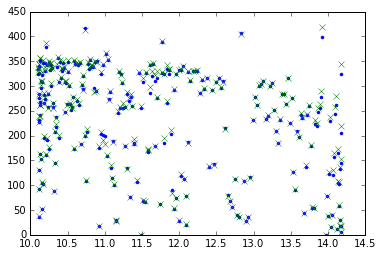

In [148]:
#plt.plot(CT02_v4["Inversor 02.1 - ACTIVE POWER - kW"],CT02_v4['Daylight Hours'],'.',
#        CT02_v4["Inversor 02.2 - ACTIVE POWER - kW"],CT02_v4['Daylight Hours'],'-')
#plt.plot(CT02_v4["Inversor 02.1 - ACTIVE POWER - kW"],CT02_v4['Daylight Hours'],'.')
plt.plot(CT02_v4['Daylight Hours'],CT02_v4["Inversor 02.1 - ACTIVE POWER - kW"],'.',
        CT02_v4['Daylight Hours'],CT02_v4["Inversor 02.2 - ACTIVE POWER - kW"],'x')

#### 5.1.2 ACTIVE POWER de Inversos 2.1 y 2.2 en función de la Temperatura medida por la Estación 07

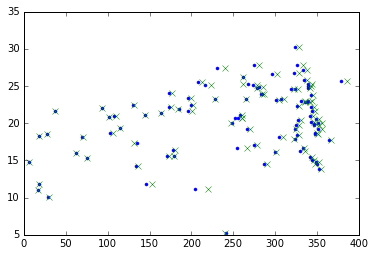

In [149]:
plt.plot(CT02_v4["Inversor 02.1 - ACTIVE POWER - kW"],CT02_v4['Estacion meteorologica 07 - TEMPERATURA AMBIENTE - C'],'.',
        CT02_v4["Inversor 02.2 - ACTIVE POWER - kW"],CT02_v4['Estacion meteorologica 07 - TEMPERATURA AMBIENTE - C'],'x')

In [129]:
CT02_v4.show(view="Scatter Plot", x="Inversor 02.1 - ACTIVE POWER - kW", y = 'Estacion meteorologica 07 - TEMPERATURA AMBIENTE - C')

### 5.2 Dividiendo datos 80/20

In [150]:
training_data,test_data = CT02_v4.random_split(.8,seed=0)

In [151]:
training_data.head()

Inversor 02.1 - ACTIVEENERGY - kWh ...,Inversor 02.1 - ACTIVEENERGY TODAY - kWh ...,Inversor 02.1 - ACTIVEPOWER - kW ...,Inversor 02.1 - DC ENERGY- kWh ...,Inversor 02.1 - POWERFACTOR - ...
1656373.69231,1648790.69231,324.004945055,1697636.67582,0.601043956044
1659816.76955,1652233.76955,204.366666667,1701165.31687,0.412386831276
1664225.47706,1656642.47706,145.601834862,1705683.71101,0.408532110092
1666225.28959,1658642.28959,17.6615384615,1707731.69231,0.374705882353
1658921.94064,1651373.56621,6.09634703196,1700244.68037,0.267214611872
1666800.75455,1659217.75455,17.2145454545,1708317.06818,0.350363636364
1667381.80827,1659798.80827,29.0778195489,1708908.09398,0.43969924812
1669129.33681,1661546.33681,133.435416667,1710695.94444,0.413402777778
1672136.87324,1664553.87324,102.749647887,1713777.14085,0.399084507042
1674228.02817,1666645.02817,57.4623239437,1715918.91549,0.395176056338


In [152]:
training_data.num_rows()

225

In [153]:
test_data.num_rows()

42

### 5.3 Construyento Modelo por Regresión Lineal Múltiple

In [154]:
print training_data.column_types()

[<type 'float'>, <type 'float'>, <type 'float'>, <type 'float'>, <type 'float'>, <type 'float'>, <type 'float'>, <type 'float'>, <type 'float'>, <type 'float'>, <type 'float'>, <type 'float'>, <type 'str'>, <type 'float'>, <type 'float'>, <type 'float'>, <type 'float'>]


In [156]:
simple_model = graphlab.linear_regression.create(training_data, target='Inversor 02.1 - ACTIVE POWER - kW',
                                                 features=['Daylight Hours'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 210

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 1.002057     | 239.958622         | 113.980672           | 100.737305    | 72.273112       |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [158]:
simple_model.show()

In [164]:
print simple_model.evaluate(test_data)

{'max_error': 194.3525329639591, 'rmse': 87.18639488624169}
